<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd
import numpy as np

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(source_url)

In [4]:
iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
iowa.shape

(1460, 81)

In [6]:
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# column types
# pd.set_option('display.max_rows', 100)
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [9]:
iowa.Fireplaces.sample(4)

1028    1
889     1
307     0
408     1
Name: Fireplaces, dtype: int64

In [10]:
iowa['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [11]:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [12]:
np.nan

nan

In [13]:
type(np.nan)

float

In [14]:
# how much missing data
iowa['LotFrontage'].isnull().sum()

259

In [15]:
# now how much missing data?
iowa.shape

(1460, 81)

In [0]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small = iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

In [17]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [18]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small['PricePerSqFt'] = small['SalePrice'] / small['TotalSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [19]:
# what are some categorical columns?
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
1114,Reg,NaN,Pave,Normal
288,IR1,NaN,Pave,Normal
515,Reg,NaN,Pave,Partial
55,IR1,NaN,Pave,Normal
129,Reg,NaN,Pave,Abnorml


In [20]:
# values of sale condition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
# create a new categorical variable
iowa['NormalCondition'] = np.where(iowa['SaleCondition'] == 'Normal', 1, 0)

In [22]:
# Map this from four down to 3 values
iowa['LotShape3'] = iowa['LotShape'].map({'Reg': 'Regular', 'IR1': 'Irregular', 'IR2': 'Other', 'IR3': 'Other'})
iowa.LotShape3.value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [23]:
# value counts of a categorical variable
iowa.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [24]:
# replace using .loc 
iowa['top_neighbors'] = 'All Others'
iowa.top_neighbors.head()

0    All Others
1    All Others
2    All Others
3    All Others
4    All Others
Name: top_neighbors, dtype: object

In [25]:
iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
479,All Others,OldTown
634,All Others,OldTown
319,All Others,NWAmes
531,All Others,BrkSide
427,North Ames,NAmes
141,All Others,CollgCr
1166,All Others,CollgCr
1347,All Others,Timber
662,North Ames,NAmes
49,All Others,Sawyer


In [26]:
iowa.loc[iowa['Neighborhood'] == 'CollgCr', 'top_neighbors'] = 'College Circle'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
130,North Ames,NAmes
1157,All Others,NridgHt
600,All Others,NridgHt
674,North Ames,NAmes
1287,All Others,ClearCr
256,All Others,Somerst
351,All Others,ClearCr
1330,All Others,Somerst
881,All Others,Timber
869,All Others,SawyerW


In [27]:
iowa.loc[iowa['Neighborhood'] == 'Gilbert', 'top_neighbors'] = 'Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerset', 'top_neighbors'] = 'Favorite Neighborhood'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1247,All Others,Mitchel
1281,All Others,Timber
11,All Others,NridgHt
172,All Others,StoneBr
394,All Others,OldTown
936,All Others,SawyerW
279,All Others,ClearCr
624,All Others,NWAmes
915,All Others,MeadowV
246,All Others,OldTown


In [28]:
iowa['top_neighbors'].value_counts()

All Others               1006
North Ames                225
College Circle            150
Favorite Neighborhood      79
Name: top_neighbors, dtype: int64

In [29]:
# crosstab!
pd.crosstab(iowa.top_neighbors, iowa.LotShape3)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,312,27,667
College Circle,53,11,86
Favorite Neighborhood,53,11,15
North Ames,66,2,157


In [30]:
# margins
pd.crosstab(iowa.top_neighbors, iowa.LotShape3, margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,312,27,667,1006
College Circle,53,11,86,150
Favorite Neighborhood,53,11,15,79
North Ames,66,2,157,225
All,484,51,925,1460


In [31]:
# as proportions
pd.crosstab(iowa.top_neighbors, iowa.LotShape3, normalize='index', margins=True)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,0.310139,0.026839,0.663022
College Circle,0.353333,0.073333,0.573333
Favorite Neighborhood,0.670886,0.139241,0.189873
North Ames,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


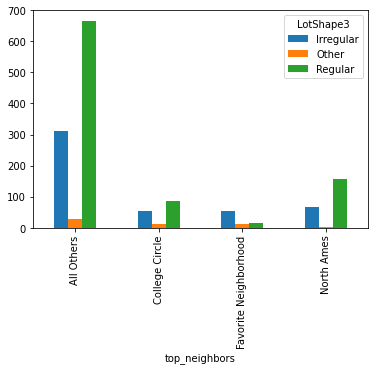

In [32]:
myresults = pd.crosstab(iowa.top_neighbors, iowa.LotShape3)
myresults.plot(kind='bar')

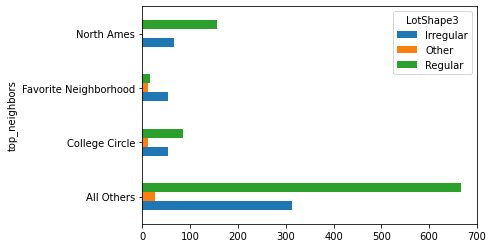

In [33]:
myresults.plot(kind='barh')

In [34]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip

--2020-05-10 20:26:07--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.26.240.115, 50.112.20.251, 54.71.0.232
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.26.240.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  22.05M  1.95MB/s    in 12s     

2020-05-10 20:26:19 (1.90 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [35]:
loans = pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
loans.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [0]:
# We can fix the header problem by using the 'skiprows' parameter
loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')

In [38]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Sum null values by column and sort from least to greatest
pd.set_option('display.max_rows', 1000)
loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [40]:
loans.shape

(128412, 144)

In [0]:
loans.drop('url', axis=1, inplace=True)

In [42]:
loans.int_rate.head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [43]:
loans.int_rate[3]

' 14.47%'

In [44]:
loans.int_rate.dtype

dtype('O')

In [45]:
type(loans.int_rate[3])

str

In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = ' 14.47%'

In [47]:
# remove leading space
int_rate = int_rate.lstrip()
print(int_rate)

14.47%


In [48]:
# remove percent
int_rate = int_rate.strip('%')
print(int_rate)

14.47


In [49]:
# remove both
int_rate = int_rate.lstrip().strip('%')
print(int_rate)

14.47


In [50]:
# "Cast" the string value to a float
float(int_rate)

14.47

In [0]:
# put it all together
int_rate = float(int_rate.lstrip().strip('%'))

In [61]:
# check our work
type(float(int_rate.lstrip().strip('%')))

float

In [0]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.
def myfunc(cell_contents):
  return float(cell_contents.lstrip().strip('%'))

In [63]:
# Test out our function by calling it on our example
myfunc(int_rate)

14.47

In [64]:
type(myfunc(int_rate))

float

In [0]:
# for loop:
newlist = []
for cell in loans['int_rate']:
  newlist.append(myfunc(cell))

In [66]:
newlist[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [67]:
print(loans['int_rate'].head())
list(loans['int_rate'][:10])

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
Name: int_rate, dtype: object


[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
loans['int_rate_clean'] = pd.Series(newlist)

In [69]:
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
# improve all of this code with the .apply function!
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [71]:
# look at the top 20 rows
loans.emp_title.head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [72]:
# Look at the top 20 employment titles
loans.emp_title.value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [73]:
# How many different unique employment titles are there currently?
loans.emp_title.describe()

count      107465
unique      43892
top       Teacher
freq         2090
Name: emp_title, dtype: object

In [74]:
# another way to do this
loans.emp_title.nunique()

43892

In [75]:
# How often is the employment_title null?
loans.emp_title.isnull().sum()

20947

In [0]:
# Create some examples that represent the cases that we want to clean up
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [77]:
# do that same function in individual steps
type('Supervisor')
isinstance('Supervisor', str)

True

In [78]:
# what about the strip?
' supervisor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean up these use cases and increase uniformity.
def cleantitle(jobtitle):
  if isinstance(jobtitle, str):
    return(jobtitle.title().strip())
  else:
    return 'Unknown'

In [80]:
# test our function
cleantitle(' sUpErViSoR')

'Supervisor'

In [0]:
# create a for loop:
mylist = []
for jobtitle in examples:
  mylist.append(cleantitle(jobtitle))

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
loans['clean_title'] = loans['emp_title'].apply(cleantitle)


In [84]:
# list all columns
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [85]:
# check out one column
loans.issue_d

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
            ...   
128407    Oct-2018
128408    Oct-2018
128409    Oct-2018
128410    Oct-2018
128411    Oct-2018
Name: issue_d, Length: 128412, dtype: object

In [86]:
# as a for loop:
mylist = []
for col in loans.columns:
  if col.endswith('_d'):
    mylist.append(col)

mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [87]:
# dtype
type(loans['issue_d'][0])

str

In [0]:
# infer_datetime_format=True
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

In [89]:
# check our work
loans[['new_issue_d', 'issue_d']]

,new_issue_d,issue_d
0,2018-12-01,Dec-2018
1,2018-12-01,Dec-2018
2,2018-12-01,Dec-2018
3,2018-12-01,Dec-2018
4,2018-12-01,Dec-2018
...,...,...
128407,2018-10-01,Oct-2018
128408,2018-10-01,Oct-2018
128409,2018-10-01,Oct-2018
128410,2018-10-01,Oct-2018


In [90]:
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [91]:
loans.year = loans['new_issue_d'].dt.year
loans.year.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    2018
1    2018
2    2018
3    2018
4    2018
Name: new_issue_d, dtype: int64

In [92]:
loans.month = loans['new_issue_d'].dt.month
loans.month.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    12
1    12
2    12
3    12
4    12
Name: new_issue_d, dtype: int64

In [93]:
loans.weekday = loans['new_issue_d'].dt.weekday
loans.weekday.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


53927     3
45319     3
12250     5
33013     5
84550     0
53340     3
18162     5
22458     5
114166    0
55566     3
Name: new_issue_d, dtype: int64

In [0]:
# look at their types!
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(10)

In [96]:
# same thing, diff var
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


In [0]:
# date arithmetic
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']

In [98]:
loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()

,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [99]:
loans['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01